# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from weather_key import wkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# Tip: to visualize the 'zipped object', we can turn it into a list immediately, and perform familiar logic respectively -> len(), index accessing, etc
lat_lngs = list(zip(lats, lngs))

# Identify nearest city for each lat, lng combination using tuples.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Show list of cities
print(cities)

['bredasdorp', 'torbay', 'nizhneyansk', 'rikitea', 'thompson', 'megion', 'bethel', 'dukat', 'isangel', 'ushuaia', 'bathsheba', 'busselton', 'butaritari', 'tuktoyaktuk', 'katsuura', 'chuy', 'mataura', 'ilulissat', 'udachnyy', 'ust-kuyga', 'castro', 'richards bay', 'ust-maya', 'san carlos de bariloche', 'upernavik', 'bintulu', 'ostrovnoy', 'whyalla', 'palmer', 'puerto rico', 'chaman', 'vaini', 'avarua', 'hobart', 'punta arenas', 'kimbe', 'nikolskoye', 'padang', 'kavieng', 'arraial do cabo', 'hithadhoo', 'kapaa', 'saurimo', 'magistralnyy', 'port hedland', 'pisco', 'albany', 'yellowknife', 'chokurdakh', 'bluff', 'cumaribo', 'ahuimanu', 'tiksi', 'nemuro', 'amderma', 'dourados', 'nan', 'carnarvon', 'pitimbu', 'lompoc', 'pevek', 'ampanihy', 'barrow', 'talnakh', 'north bend', 'mandera', 'saskylakh', 'tulun', 'sambava', 'hilo', 'east london', 'jizan', 'teeli', 'tabiauea', 'umm lajj', 'natal', 'pangnirtung', 'hermanus', 'dingle', 'tazmalt', 'mumford', 'sitka', 'fillan', 'saldanha', 'dikson', 'na

In [3]:
# Create a duplicate-free copy of an array using numpy.unique()
cities_unique = np.unique(cities)

print(len(cities_unique))
print("Are the two city lists equal in size? ->", len(cities) == len(cities_unique))

596
Are the two city lists equal in size? -> True


In [4]:
# Create a duplicate free copy of an array using the Pandas' Series or Dataframe method: .drop_duplicates()

# Convert to DataFrame
cities_df = pd.DataFrame(cities)
print(cities_df.tail(50))

# use .drop_duplicates() method to create new DF (recommended to make a new one, and name it accordingly). This filters out duplicates from cities_df and stores it in new DF.
cities_unique_df = cities_df.drop_duplicates()

cities_unique_df

                           0
546                  derveni
547                 mormugao
548                rey bouba
549                rawannawi
550           gornopravdinsk
551               livingston
552                    bagan
553                   acarau
554                  antakya
555                   warqla
556                   rawson
557                  yomitan
558                 hoa binh
559                     faya
560                    arona
561                    upata
562               walvis bay
563               nueva loja
564                    jinxi
565                  ballina
566              bandarbeyla
567                    tacna
568              provideniya
569                 cabedelo
570                  ikorodu
571               louisbourg
572                   ryotsu
573                   george
574                     uvat
575                 shenzhen
576                   riyadh
577                    kuche
578               ishinomaki
579           

,0
0,bredasdorp
1,torbay
2,nizhneyansk
3,rikitea
4,thompson
5,megion
6,bethel
7,dukat
8,isangel
9,ushuaia


In [5]:
lat_lngs

[(-76.42056923232758, 25.76378309206342),
 (44.12473734415602, -47.40205038343149),
 (84.82094664452356, 134.39017180339897),
 (-17.33285280033715, -113.56880437795769),
 (75.67891824596603, -95.9330224906843),
 (60.76054027338182, 76.27532325627845),
 (50.77777951312501, -169.19327917564974),
 (64.5220107231093, 154.30510375432033),
 (-15.124490688611985, 175.6490957861376),
 (-54.38929131912382, -52.988247515336326),
 (-66.3822617205507, -140.9205461865227),
 (12.694824487678176, -52.92038265450765),
 (-44.734303823086584, 100.93283815279278),
 (23.271888049599667, 179.22056414097528),
 (76.39641126807732, -128.81710883738813),
 (-64.63901415601433, -116.27011710900025),
 (28.008503166075954, 147.3027297590608),
 (-45.583379660978416, -42.11679705471664),
 (-65.12270825753319, -65.51162337739838),
 (-56.06612616824289, -152.95501409185266),
 (88.33001428177374, -40.005307703938655),
 (67.91465422329347, 114.04313418258306),
 (69.98526549718619, 137.61020241464297),
 (85.3155799543162

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather"

In [7]:
# Create lists for holding all relevant data.
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Establish the data retrieval counter and set it to 1. You will increase it (+1) in for loop, below.
record = 1

# Print statement of data retrieval 
print("Beginning Data Retrieval")
print("------------------------")

# Using a for loop, loop through the cities in the city list
# for city in cities:
for i in range(len(cities)):
    city = cities[i]
    try:
        # url at the current configuration:'http://api.openweathermap.org/data/2.5/weather?q={city}&APPID=ad77a28e519eb987f6fea5444af81b47'
        city_call_url = url + "?q=" + city + "&units=imperial" + "&APPID=" + wkey

        response = requests.get(city_call_url).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")

        # Increase counter by 1 inside the for loop
        record = record + 1

        # Free access to API permits only 60 calls per minute. Hold loop for 1 second before next city.
        time.sleep(1.01)
        
    # If no record is found, skip to the next city in list. Print "City not found" if no result.
    except: 
        print("City not found. Skipping to next.")
    continue

Beginning Data Retrieval
------------------------
Processing Record 1 | Bredasdorp
Processing Record 2 | Torbay
City not found. Skipping to next.
Processing Record 3 | Rikitea
Processing Record 4 | Thompson
Processing Record 5 | Megion
Processing Record 6 | Bethel
Processing Record 7 | Dukat
Processing Record 8 | Isangel
Processing Record 9 | Ushuaia
Processing Record 10 | Bathsheba
Processing Record 11 | Busselton
Processing Record 12 | Butaritari
Processing Record 13 | Tuktoyaktuk
Processing Record 14 | Katsuura
Processing Record 15 | Chuy
Processing Record 16 | Mataura
Processing Record 17 | Ilulissat
Processing Record 18 | Udachnyy
Processing Record 19 | Ust-Kuyga
Processing Record 20 | Castro
Processing Record 21 | Richards Bay
Processing Record 22 | Ust-Maya
Processing Record 23 | San Carlos de Bariloche
Processing Record 24 | Upernavik
Processing Record 25 | Bintulu
Processing Record 26 | Ostrovnoy
Processing Record 27 | Whyalla
Processing Record 28 | Palmer
Processing Record 29

Processing Record 224 | Emerald
Processing Record 225 | Andros Town
Processing Record 226 | Saint-Pierre
Processing Record 227 | Namibe
Processing Record 228 | Saint George
Processing Record 229 | Sorgun
Processing Record 230 | Komsomolskiy
Processing Record 231 | Pacific Grove
Processing Record 232 | Bonavista
Processing Record 233 | Kenora
Processing Record 234 | Faanui
Processing Record 235 | Kamaishi
Processing Record 236 | Nioro
Processing Record 237 | Nouadhibou
Processing Record 238 | Lima
Processing Record 239 | Khipro
Processing Record 240 | Banjar
Processing Record 241 | Sao Domingos
Processing Record 242 | Whitehorse
Processing Record 243 | Axim
Processing Record 244 | Tura
Processing Record 245 | Jambi
Processing Record 246 | La Ronge
Processing Record 247 | Banda Aceh
Processing Record 248 | Nortelandia
Processing Record 249 | Honningsvag
Processing Record 250 | Challans
Processing Record 251 | Harnosand
Processing Record 252 | Yuci
Processing Record 253 | Chiredzi
Process

Processing Record 447 | Egvekinot
Processing Record 448 | Ternate
Processing Record 449 | High Level
Processing Record 450 | Bilibino
Processing Record 451 | Magadan
Processing Record 452 | Shenjiamen
Processing Record 453 | Kampot
Processing Record 454 | Goderich
Processing Record 455 | Ostersund
Processing Record 456 | Cherskiy
Processing Record 457 | Athmallik
Processing Record 458 | Guthrie
Processing Record 459 | Garden City
Processing Record 460 | Nizhniy Kuranakh
Processing Record 461 | The Valley
Processing Record 462 | Jalu
Processing Record 463 | Rio Claro
Processing Record 464 | Kamenka
Processing Record 465 | Yagodnoye
Processing Record 466 | Inuvik
Processing Record 467 | Hervey Bay
Processing Record 468 | Tessalit
Processing Record 469 | Diamantino
Processing Record 470 | Amuntai
Processing Record 471 | Maragogi
Processing Record 472 | Boshnyakovo
Processing Record 473 | Dongsheng
Processing Record 474 | Yichun
Processing Record 475 | Coxim
Processing Record 476 | Te Anau

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Create a dictionary with the lists generated above.
weatherpy_dict = {
    "City" : city_name,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date, 
    "Humidity" : humidity, 
    "Lat" : lat, 
    "Lng" : lng, 
    "Max Temp" : max_temp, 
    "Wind Speed" : wind_speed
}

# Generate a data frame from the dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of values for each 
weather_data.count()

print(weather_data)

                        City  Cloudiness Country        Date  Humidity    Lat  \
0                 Bredasdorp          52      ZA  1559783433        87 -34.53   
1                     Torbay          40      CA  1559783675        57  47.66   
2                    Rikitea         100      PF  1559783448        84 -23.12   
3                   Thompson          75      CA  1559783505        72  55.74   
4                     Megion           0      RU  1559783679        59  61.04   
5                     Bethel           1      US  1559783435        58  60.79   
6                      Dukat          74      RS  1559783647        93  42.44   
7                    Isangel          90      VU  1559783682        88 -19.55   
8                    Ushuaia           0      AR  1559783474        70 -54.81   
9                  Bathsheba          20      BB  1559783684        74  13.22   
10                 Busselton         100      AU  1559783463        15 -33.64   
11                Butaritari

In [9]:
# Display data frame head
weather_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bredasdorp,52,ZA,1559783433,87,-34.53,20.04,51.80,8.05
1,Torbay,40,CA,1559783675,57,47.66,-52.73,53.01,17.22
2,Rikitea,100,PF,1559783448,84,-23.12,-134.97,76.91,13.04
3,Thompson,75,CA,1559783505,72,55.74,-97.86,59.00,5.82
4,Megion,0,RU,1559783679,59,61.04,76.11,60.80,8.95


In [10]:
# Save data frame to CSV
weather_data.to_csv("weather_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

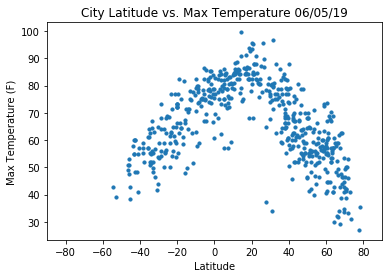

In [11]:
# Build a scatter plot for latitude vs. max temperature
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature {time.strftime('%x')}")

plt.xlim((-90,90))

# Save figure 
plt.savefig("lat_vs_maxtemp.png")

plt.show()


#### Latitude vs. Humidity Plot

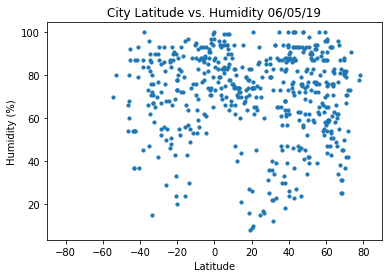

In [12]:
# Build a scatter plot for latitude vs. max temperature
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity {time.strftime('%x')}")

plt.xlim((-90,90))

# Save figure 
plt.savefig("lat_vs_humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

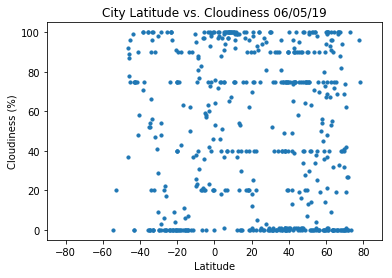

In [13]:
# Build a scatter plot for latitude vs. max temperature
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness {time.strftime('%x')}")

plt.xlim((-90,90))

# Save figure 
plt.savefig("lat_vs_cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

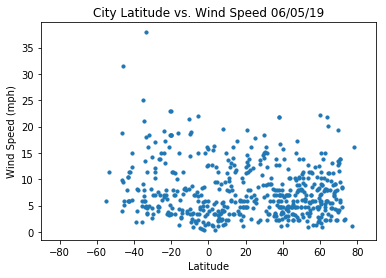

In [14]:
# Build a scatter plot for latitude vs. max temperature
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed {time.strftime('%x')}")

plt.xlim((-90,90))

# Save figure 
plt.savefig("lat_vs_wind.png")

plt.show()